In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os


# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation
# Convolutional Layer 
# 합성곱을 수행하는 레이어
# Convolutionla Layer 를 사용하는 신경망을 CNN이라고 부른다.
# 커널에 설정되어 있는 가중치 값에 따라서 특정 부분의 값을 낮추고 특정 부분의 값을 키워서
# 특성이 잘 드러나게 하는 역할을 수행한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling
# Convolutional Layer를 통과한 데이터에서 큰 부분만 취하는 역할을 수행한다.
# 필요한 특성을 나타내는 부분을 취하고 나머지는 버리는 효과를 얻게 된다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# 다차원의 데이터를 1차원 데이터로 변환시켜준다.
# 선형회귀 레이어로 가기전에 두어야 한다.
from tensorflow.keras.layers import Flatten
# Dropout : 데이터 하나가 들어오면 레이어의 모든 노드가 그 데이터를 학습하게 된다.
# 그렇기 때문에 모든 가중치 값이 데이터에 영향을 받아서 변경된다.
# 만약 각 노드들이 특정 패턴의 데이터만 학습하고자 한다면 학습시 일부 노드들을 비활성화 시켜서
# 학습에 참여시키지 않게 할 수 있다.
# 전체 데이터에 대해 모든 노드들이 과접합을 되는 것을 예방한다.
from tensorflow.keras.layers import Dropout
# Embedding : 주어진 단어 데이터를 통해 단어 벡터를 생성하는 레이어
# 생성한 벡터 공간의 차원을 매개변수로 받는다.
# 주어진 문장 데이터의 단어 개수가 공간의 차원을 넘어서면 출현 빈도수가 높은 단어들로만
# 구성하여 공간 벡터를 구성한다.
from tensorflow.keras.layers import Embedding
# LSTM : RNN 용 Layer
# 이전에 입력된 데이터와 함께 묶어서 학습할 데이터를 생성하는 방식으로 동작하는 레이어
# 순환신경망. 문장 데이터, 주식시세, 시계열 데이터 등의 데이터 패턴을 보고 다음 데이터를
# 예측하는데 사용한다.
# LSTM은 Long Term Memory와 Short Term Memory를 두어 데이터의 패턴이 좀더 다양하게 생성될 수 
# 있도록 하는 특징을 가지고 있다.
from tensorflow.keras.layers import LSTM

# GAN
# GAN에서 사용하는 활성화 함수
from tensorflow.keras.layers import LeakyReLU
# 레이어를 통과한 데이터를 다시 표준화하여 학습 효율성을 높히게 한다.
from tensorflow.keras.layers import BatchNormalization
# 레이어를 통과한 데이터의 차원을 변경하기위 사용한다.
from tensorflow.keras.layers import Reshape
# 데이터 업샘플링 - Convolutional Layer가 데이터의 크기를 줄이므로 늘리는 것이 필요하다
from tensorflow.keras.layers import UpSampling2D
# 입력층
from tensorflow.keras.layers import Input
# 딥러닝 모델, GAN은 생성자 신경망과 판별자 신경망을 같이 써야 하기 때문에
# 이 둘을 하나의 신경망으로 합치기 위해 사용한다.
from tensorflow.keras.models import Model

# 다중 분류를 위한 원핫 인코딩
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델 복원
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기 중단
from tensorflow.keras.callbacks import EarlyStopping

# 경사하강법
from tensorflow.keras.optimizers import Adam

# 문자열을 잘라낸다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터 수를 동일하게 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 단어 사전으로 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전이 학습을 위한 사전 학습 모델
from tensorflow.keras.applications import VGG16

# 이미지 데이터를 불러올 때 나눠서 읽어오거나 읽어올때 이미지 데이터를 가공하면서
# 가져울 수 있는 도구
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 출력한 것을 청소하는 함수
from IPython.display import clear_output
# 시간 관련
import time

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [3]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import gc

# 1) 회원정보 파일 경로 리스트
member_paths = [
    "open/train/1.회원정보/201807_train_회원정보.parquet",
    "open/train/1.회원정보/201808_train_회원정보.parquet",
    "open/train/1.회원정보/201809_train_회원정보.parquet",
    "open/train/1.회원정보/201810_train_회원정보.parquet",
    "open/train/1.회원정보/201811_train_회원정보.parquet",
    "open/train/1.회원정보/201812_train_회원정보.parquet",
]

# 2) 회원정보 통합 및 세그먼트 인코딩
df_members = pd.concat([pd.read_parquet(p)[['ID', 'Segment']] for p in member_paths])
le = LabelEncoder()
df_members['Segment_code'] = le.fit_transform(df_members['Segment'])

# 3) 처리할 큰 파일 리스트와 필요한 컬럼 (ID 포함 필수)
# 3) 처리할 큰 파일 리스트와 필요한 컬럼 (ID 포함 필수)
file_columns = {
    # 3.승인매출정보
    "open/train/3.승인매출정보/201807_train_승인매출정보.parquet": [
        'ID', '정상청구원금_B0M', '이용금액_일시불_B0M', '정상입금원금_B2M'
    ],
    "open/train/3.승인매출정보/201808_train_승인매출정보.parquet": [
        'ID', '정상청구원금_B0M', '이용금액_일시불_B0M', '정상입금원금_B2M'
    ],
    "open/train/3.승인매출정보/201809_train_승인매출정보.parquet": [
        'ID', '정상청구원금_B0M', '이용금액_일시불_B0M', '정상입금원금_B2M'
    ],
    "open/train/3.승인매출정보/201810_train_승인매출정보.parquet": [
        'ID', '정상청구원금_B0M', '이용금액_일시불_B0M', '정상입금원금_B2M'
    ],
    "open/train/3.승인매출정보/201811_train_승인매출정보.parquet": [
        'ID', '정상청구원금_B0M', '이용금액_일시불_B0M', '정상입금원금_B2M'
    ],
    "open/train/3.승인매출정보/201812_train_승인매출정보.parquet": [
        'ID', '정상청구원금_B0M', '이용금액_일시불_B0M', '정상입금원금_B2M'
    ],

    # 4.청구입금정보
    "open/train/4.청구입금정보/201807_train_청구정보.parquet": [
        'ID', '청구금액_B0', '청구금액_R3M', '청구금액_R6M'
    ],
    "open/train/4.청구입금정보/201808_train_청구정보.parquet": [
        'ID', '청구금액_B0', '청구금액_R3M', '청구금액_R6M'
    ],
    "open/train/4.청구입금정보/201809_train_청구정보.parquet": [
        'ID', '청구금액_B0', '청구금액_R3M', '청구금액_R6M'
    ],
    "open/train/4.청구입금정보/201810_train_청구정보.parquet": [
        'ID', '청구금액_B0', '청구금액_R3M', '청구금액_R6M'
    ],
    "open/train/4.청구입금정보/201811_train_청구정보.parquet": [
        'ID', '청구금액_B0', '청구금액_R3M', '청구금액_R6M'
    ],
    "open/train/4.청구입금정보/201812_train_청구정보.parquet": [
        'ID', '청구금액_B0', '청구금액_R3M', '청구금액_R6M'
    ],

    # 5.잔액정보
    "open/train/5.잔액정보/201807_train_잔액정보.parquet": [
        'ID', '평잔_일시불_6M', '월중평잔_일시불_B0M', '잔액_할부_B0M'
    ],
    "open/train/5.잔액정보/201808_train_잔액정보.parquet": [
        'ID', '평잔_일시불_6M', '월중평잔_일시불_B0M', '잔액_할부_B0M'
    ],
    "open/train/5.잔액정보/201809_train_잔액정보.parquet": [
        'ID', '평잔_일시불_6M', '월중평잔_일시불_B0M', '잔액_할부_B0M'
    ],
    "open/train/5.잔액정보/201810_train_잔액정보.parquet": [
        'ID', '평잔_일시불_6M', '월중평잔_일시불_B0M', '잔액_할부_B0M'
    ],
    "open/train/5.잔액정보/201811_train_잔액정보.parquet": [
        'ID', '평잔_일시불_6M', '월중평잔_일시불_B0M', '잔액_할부_B0M'
    ],
    "open/train/5.잔액정보/201812_train_잔액정보.parquet": [
        'ID', '평잔_일시불_6M', '월중평잔_일시불_B0M', '잔액_할부_B0M'
    ]
}

# 4) 모델 및 scaler 초기화
model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
scaler = StandardScaler()

# 5) 전체 정확도 기록용
all_y_true = []
all_y_pred = []

# 6) Chunk 사이즈 (조절 가능)
chunk_size = 1000

# 7) 각 파일을 chunk 단위로 처리
for file_path, columns in file_columns.items():
    print(f"\n▶️ 처리 중: {file_path}")
    table = pq.read_table(file_path, columns=columns)
    num_rows = table.num_rows

    for start in range(0, num_rows, chunk_size):
        end = min(start + chunk_size, num_rows)
        chunk = table.slice(start, end - start).to_pandas()

        # 회원정보와 병합 (inner join으로 ID 일치하는 데이터만)
        chunk = pd.merge(chunk, df_members[['ID', 'Segment_code']], on='ID', how='inner')

        # 결측치 제거
        chunk = chunk.dropna(subset=['Segment_code'])
        if chunk.empty:
            print(f"    ⚠️ {start}-{end} 구간 데이터 없음")
            continue

        # 피처(X)와 타겟(y) 분리
        y = chunk['Segment_code']
        X = chunk.drop(columns=['ID', 'Segment_code']).astype('float32')

        # 정규화: chunk 단위로 scaler 재학습 → 메모리 이슈 낮춤 (단, 각 chunk별 스케일이 달라질 수 있음 주의)
        X_scaled = scaler.fit_transform(X)

        # 학습/평가 데이터 분리
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.1, random_state=42
        )

        # incremental 학습 (처음 호출 시 classes 지정)
        if not hasattr(model, 'classes_'):
            model.partial_fit(X_train, y_train, classes=np.unique(le.transform(df_members['Segment'])))
        else:
            model.partial_fit(X_train, y_train)

        # 평가
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"    Chunk {start}-{end} 정확도: {acc:.4f}")

        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

        # 메모리 정리
        del chunk, X, y, X_scaled, X_train, X_test, y_train, y_test, y_pred
        gc.collect()

# 8) 전체 정확도
if all_y_true:
    overall_acc = accuracy_score(all_y_true, all_y_pred)
    print(f"\n✅ 전체 데이터 누적 정확도: {overall_acc:.4f}")
else:
    print("\n❗ 처리 가능한 데이터가 없습니다.")


▶️ 처리 중: open/train/3.승인매출정보/201807_train_승인매출정보.parquet
    Chunk 0-1000 정확도: 0.7250
    Chunk 1000-2000 정확도: 0.8233
    Chunk 2000-3000 정확도: 0.8133
    Chunk 3000-4000 정확도: 0.8100
    Chunk 4000-5000 정확도: 0.7800
    Chunk 5000-6000 정확도: 0.8283
    Chunk 6000-7000 정확도: 0.7917
    Chunk 7000-8000 정확도: 0.7900
    Chunk 8000-9000 정확도: 0.7983
    Chunk 9000-10000 정확도: 0.8350
    Chunk 10000-11000 정확도: 0.8133
    Chunk 11000-12000 정확도: 0.8133
    Chunk 12000-13000 정확도: 0.8500
    Chunk 13000-14000 정확도: 0.8267
    Chunk 14000-15000 정확도: 0.7933
    Chunk 15000-16000 정확도: 0.8100
    Chunk 16000-17000 정확도: 0.8317
    Chunk 17000-18000 정확도: 0.8067
    Chunk 18000-19000 정확도: 0.8483
    Chunk 19000-20000 정확도: 0.8333
    Chunk 20000-21000 정확도: 0.8067
    Chunk 21000-22000 정확도: 0.8117
    Chunk 22000-23000 정확도: 0.7950
    Chunk 23000-24000 정확도: 0.8100
    Chunk 24000-25000 정확도: 0.8233
    Chunk 25000-26000 정확도: 0.8250
    Chunk 26000-27000 정확도: 0.7917
    Chunk 27000-28000 정확도: 0.8167
    Chunk 28

### 혼동 행렬(confusion Matrix) 확인

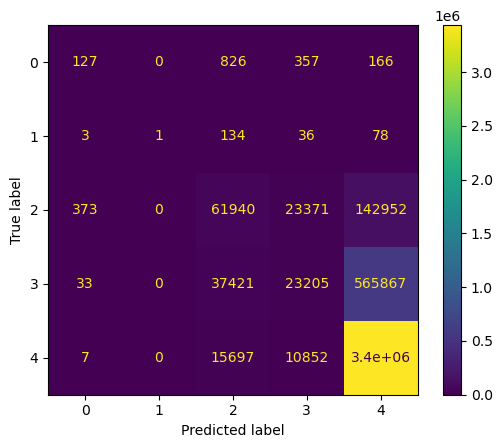

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mtx = confusion_matrix(all_y_true, all_y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_mtx).plot()

- 클래스 4로 쏠려있는 현상을 확인할 수 있다.